In [399]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#PWD=os.getcwd()
PWD = "/media/juancho/TOSHIBA EXT/SC_evaluations_paper/sc2-benchmark"

PATH=os.path.join(PWD,"entropic_student/FSIM_N")
#PATH=os.path.join(PWD,"crbq/FSIM_N")

items = os.listdir(PATH)

directories = [item for item in items if (os.path.isdir(os.path.join(PATH,item)))]

Final_report = pd.DataFrame()

for config in directories:
    dir = os.path.join(PATH,config)    
    list_items = os.listdir(dir)    
    sim_dir=[item for item in list_items if os.path.isdir(os.path.join(dir,item))]

    #merge_files_path=os.path.join(dir,sim_dir[0])
    merge_files_path=dir
    print(sim_dir)
    full_report= pd.read_csv(os.path.join(merge_files_path,"fsim_full_report.csv"),index_col=[0])      
    full_report['MRAD']=abs(100*(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
    full_report['MRADk']=abs(100*(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])
    full_report['AbsAD']=abs((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
    full_report['AbsADk']=abs((full_report['fault_ACC@k']-full_report['gold_ACC@k']))
    full_report["FsimID"]=None    
    index=(full_report['bit_faulty_pos']>-1)
    full_report.loc[index,'FsimID']=config # I capture the folder name and assign it to eavery roww of the dataframe
    full_report['split_config']=full_report['FsimID'].apply(lambda x: x.split('_')[0])

    Final_report=pd.concat([Final_report,full_report],axis=0,ignore_index=True)

print(Final_report.head())

index = (Final_report['split_config']=='cnf77')
Final_report.loc[index,'split_config']=0
index = (Final_report['split_config']=='cnf1')
Final_report.loc[index,'split_config']=1
index = (Final_report['split_config']=='cnf2')
Final_report.loc[index,'split_config']=2
index = (Final_report['split_config']=='cnf3')
Final_report.loc[index,'split_config']=3
index = (Final_report['split_config']=='cnf6')
Final_report.loc[index,'split_config']=4
index = (Final_report['split_config']=='cnf9')
Final_report.loc[index,'split_config']=5
index = (Final_report['split_config']=='cnf12')
Final_report.loc[index,'split_config']=6

index = (Final_report['split_config']=='cnf0.08')
Final_report.loc[index,'split_config']=7
index = (Final_report['split_config']=='cnf5.12')
Final_report.loc[index,'split_config']=8

Final_report = Final_report.sort_values(['split_config'],ascending=True)

index = (Final_report['split_config']==0)
Final_report.loc[index,'split_config']='BaseLine'
index = (Final_report['split_config']==1)
Final_report.loc[index,'split_config']='CR+BQ(1)'
index = (Final_report['split_config']==2)
Final_report.loc[index,'split_config']='CR+BQ(2)'
index = (Final_report['split_config']==3)
Final_report.loc[index,'split_config']='CR+BQ(3)'
index = (Final_report['split_config']==4)
Final_report.loc[index,'split_config']='CR+BQ(6)'
index = (Final_report['split_config']==5)
Final_report.loc[index,'split_config']='CR+BQ(9)'
index = (Final_report['split_config']==6)
Final_report.loc[index,'split_config']='CR+BQ(12)'
index = (Final_report['split_config']==7)
Final_report.loc[index,'split_config']='VAE-B0.08'
index = (Final_report['split_config']==8)
Final_report.loc[index,'split_config']='VAE-B5.12'


Final_report['block_fault_rate']=Final_report['block_fault_rate'].round(2)
Final_report['block_fault_rate']=Final_report['block_fault_rate']*100


indexz = (((Final_report['split_config']=='VAE-B0.08') & (Final_report['layer_start']<4)) | 
          ((Final_report['split_config']=='VAE-B5.12') & (Final_report['layer_start']<4)) |
          (((Final_report['split_config']!='VAE-B0.08') & (Final_report['split_config']!='VAE-B5.12')) 
           & (Final_report['layer_start']<5))
          )


Final_report = Final_report.loc[indexz]


['log']
['log', 'log copy']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']


['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
['log']
   layer_start  layer_stop  size_tail_y  size_tail_x  block_fault_rate  \
0            0           0           32           32               0.2   
1            0           0           32           32               0.2   
2            0           0           32           32               0.2   
3            0           0           32           32               0.2   
4            0           0           32           32               0.2   

   neuron_fault_rate  bit_faulty_pos  gold_ACC@1  gold_ACC@k  img_Top1_Crit  \
0               0.02              19   74.900002        92.0              1   
1               0.02              19   74.900002        92.0              3   
2               0.02              19   74.900002        92.0              3   
3               0.02              19   

In [400]:
print(Final_report.describe())

        layer_start    layer_stop  size_tail_y  size_tail_x  block_fault_rate  \
count  69875.000000  69875.000000      69875.0      69875.0      69875.000000   
mean       1.906977      1.906977         32.0         32.0         60.000000   
std        1.377806      1.377806          0.0          0.0         28.284474   
min        0.000000      0.000000         32.0         32.0         20.000000   
25%        1.000000      1.000000         32.0         32.0         40.000000   
50%        2.000000      2.000000         32.0         32.0         60.000000   
75%        3.000000      3.000000         32.0         32.0         80.000000   
max        4.000000      4.000000         32.0         32.0        100.000000   

       neuron_fault_rate  bit_faulty_pos    gold_ACC@1    gold_ACC@k  \
count       69875.000000    69875.000000  69875.000000  69875.000000   
mean            0.060000       25.000000     72.598054     90.518985   
std             0.028284        3.741684      6.698808

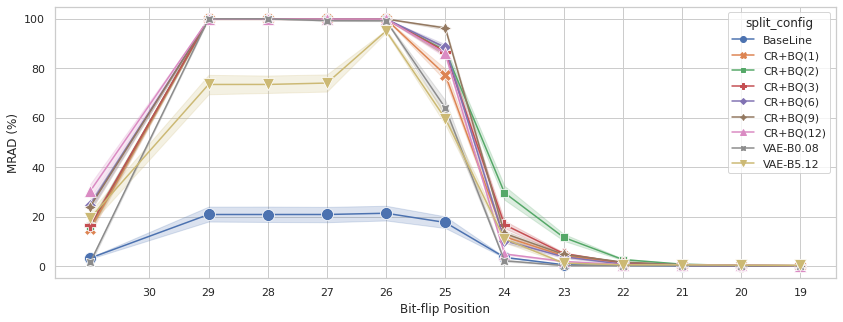

In [416]:

index = ((Final_report['bit_faulty_pos']<32) & (Final_report['bit_faulty_pos']!=30))

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(14, 5))
#sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD',hue='split_config',style="split_config",markers=True, dashes=False, markersize=12)
ax.invert_xaxis()
#ax.legend(loc='lower left')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(ax, "upper right")
#ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')
ax.set_ylabel('MRAD (%)')
ax.set_xlabel('Bit-flip Position')
ax.set_xticks(range(Final_report['bit_faulty_pos'].min(),Final_report['bit_faulty_pos'].max()))
f.savefig('N_bit-flip.pdf',format='pdf',bbox_inches='tight')

Text(0.5, 0, 'layer')

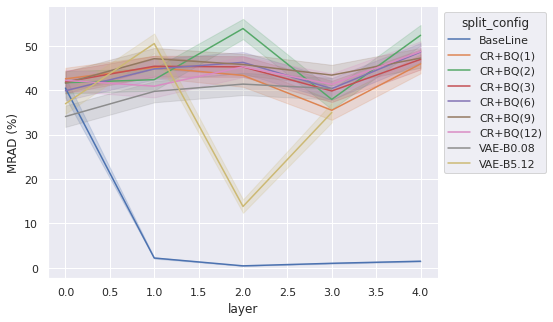

In [402]:
index = (Final_report['bit_faulty_pos']!=30) & (Final_report['layer_start']<5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='layer_start',y='MRAD',hue='split_config')
#ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#sns.move_legend(ax, "upper left")
#ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')
ax.set_ylabel('MRAD (%)')
ax.set_xlabel('layer')

Text(0.5, 1.0, 'MRAD: FI all conv layers of Head model (0-4)')

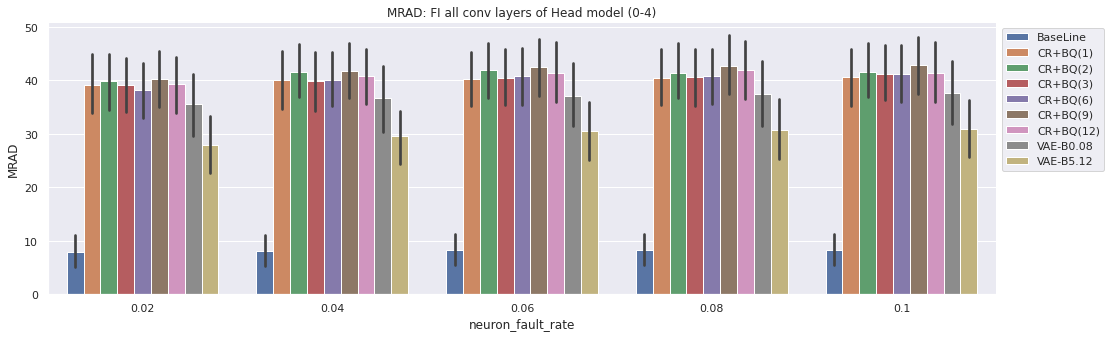

In [403]:
index = ((Final_report['bit_faulty_pos']<32) & (Final_report['layer_start']<5) & (Final_report['bit_faulty_pos']!=30) 
         & (Final_report['block_fault_rate']==20))

sns.set()
f, ax = plt.subplots(figsize=(17, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')

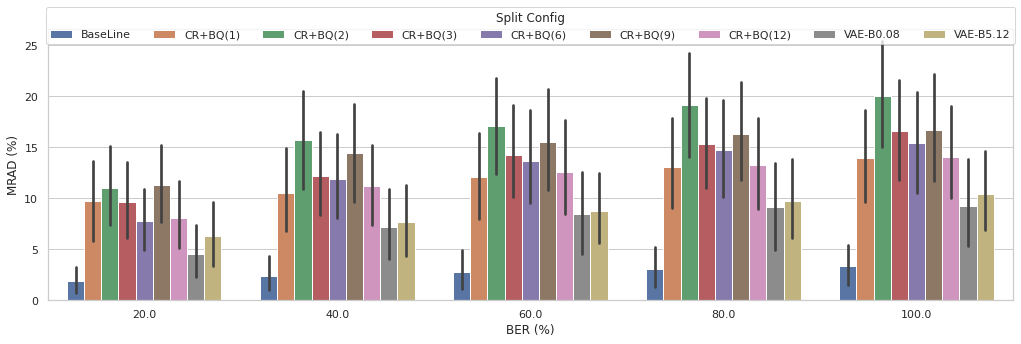

In [442]:
index = ((Final_report['bit_faulty_pos']>-1) 
         & (Final_report['bit_faulty_pos']<26)
         & (Final_report['neuron_fault_rate']==0.02)
         )
#neuron_fault_rate 
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(17.3, 5))
ax = sns.barplot(data=Final_report.loc[index],x='block_fault_rate',y='MRAD',hue='split_config')
#ax.legend(loc='lower left')
sns.move_legend(ax, "upper center", ncol=9,title='Split Config',bbox_to_anchor=(0.5,1.1))
ax.set_xlabel('BER (%)')
ax.set_ylabel('MRAD (%)')
#ax.set_ylim(0,55)
#plt.legend(loc="upper center", ncol=7,title='Split Config',bbox_to_anchor=(1, 1))
f.savefig('N_BER.pdf',format='pdf',bbox_inches='tight')
#ax.set_ylim(40,60)
#ax.set_title("MRAD: FI only in the last layer of the Head model (4)")
#ax.set_yscale('log')

Text(0.5, 1.0, 'MRAD: FI all conv layers of Head model (0-4)')

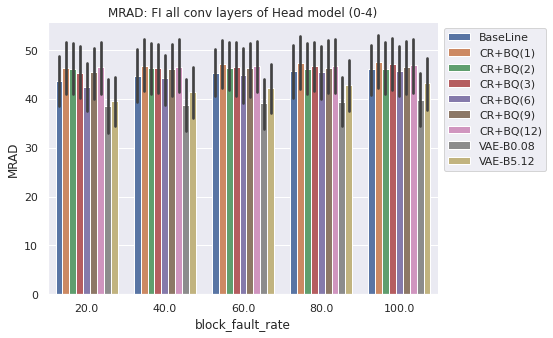

In [405]:
index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='block_fault_rate',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')

Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations all conv layersd (0-4)')

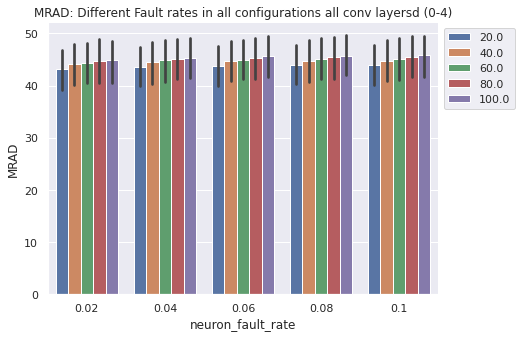

In [406]:

index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations all conv layersd (0-4)")


Text(0.5, 1.0, 'MRAD: Different Fault rates in last conv layer (4)')

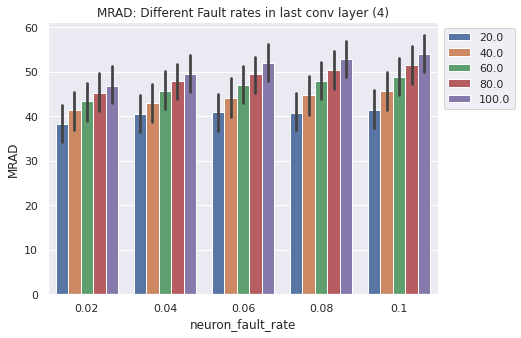

In [407]:
index = (Final_report['bit_faulty_pos']>0) & (Final_report['layer_start']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in last conv layer (4)")

Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations layer (0-4)')

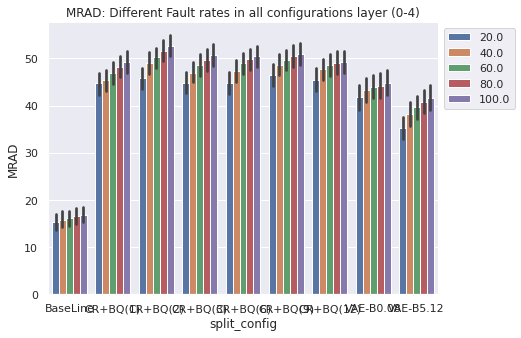

In [408]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (0-4)")

Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations layer (4)')

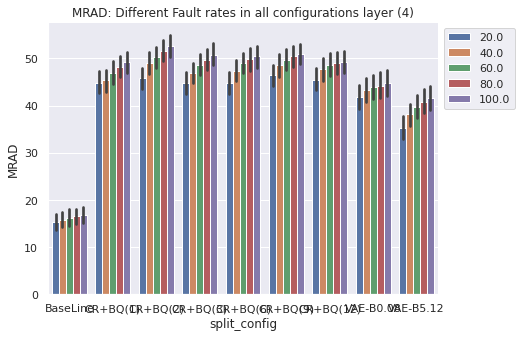

In [409]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0, 0, '16.1081'),
 Text(0, 0, '46.9169'),
 Text(0, 0, '49.8379'),
 Text(0, 0, '48.1822'),
 Text(0, 0, '48.2959'),
 Text(0, 0, '49.2585'),
 Text(0, 0, '48.0231'),
 Text(0, 0, '43.5864'),
 Text(0, 0, '39.1392')]

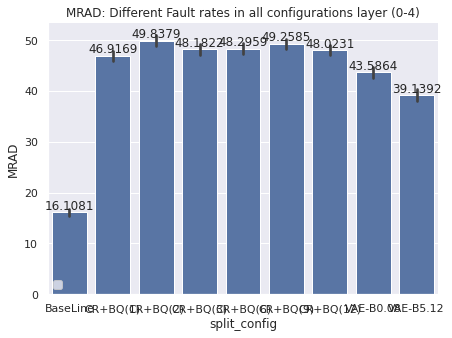

In [410]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD', color='C0')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (0-4)")
ax.bar_label(ax.containers[0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations layer (4)')

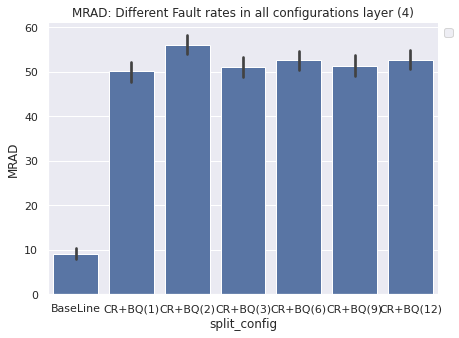

In [411]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',color='C0')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")

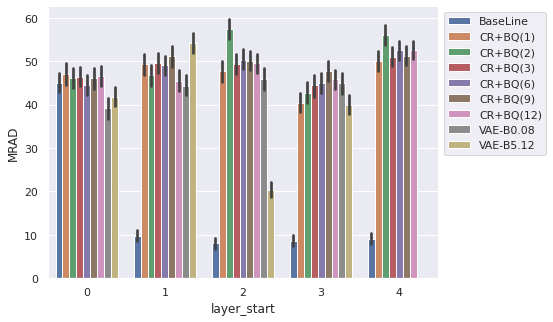

In [412]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']!=5)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='layer_start',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")

<ipython-input-413-cb37b78ff7d6>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


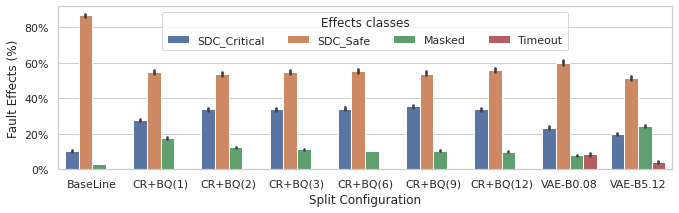

In [413]:

Final_report["SDC_Critical"]=Final_report['img_Top1_Crit']
Final_report["SDC_Safe"]=Final_report['img_Top1_SDC']
Final_report["Masked"]=Final_report['img_Top1_Masked']
Final_report["Timeout"]=0
only_timeouts=(Final_report['img_Top1_Crit']==1000) & (Final_report['img_Top1_SDC']==0) & (Final_report['img_Top1_Masked']==0) 
Final_report.loc[only_timeouts,'Timeout'] = Final_report.loc[only_timeouts,'img_Top1_Crit']
Final_report.loc[only_timeouts,"SDC_Critical"]=0


indexrate = (Final_report['split_config']=='VAE-B0.08') | (Final_report['split_config']=='VAE-B5.12')
Final_report.loc[indexrate,'SDC_Critical'] = Final_report.loc[indexrate,'SDC_Critical']/1000
Final_report.loc[indexrate,'SDC_Safe'] = Final_report.loc[indexrate,'SDC_Safe']/1000
Final_report.loc[indexrate,'Masked'] = Final_report.loc[indexrate,'Masked']/1000
Final_report.loc[indexrate,'Timeout'] = Final_report.loc[indexrate,'Timeout']/1000

Final_report.loc[~indexrate,'SDC_Critical'] = Final_report.loc[~indexrate,'SDC_Critical']/5000
Final_report.loc[~indexrate,'SDC_Safe'] = Final_report.loc[~indexrate,'SDC_Safe']/5000
Final_report.loc[~indexrate,'Masked'] = Final_report.loc[~indexrate,'Masked']/5000
Final_report.loc[~indexrate,'Timeout'] = Final_report.loc[~indexrate,'Timeout']/5000

Report=pd.melt(Final_report,
               id_vars=['layer_start', 'layer_stop', 'size_tail_y', 'size_tail_x', 'block_fault_rate',
                        'neuron_fault_rate', 'bit_faulty_pos', 'gold_ACC@1', 'gold_ACC@k',
                        'img_Top1_Crit', 'MRADk', 'AbsAD', 'AbsADk', 'FsimID', 'split_config'
                        ],
               value_vars=['SDC_Critical','SDC_Safe','Masked','Timeout'],
               var_name='Effects',
               value_name='Images')


index = (Report['bit_faulty_pos']!=30) & (Report['layer_start']<4)

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(11, 3))
ax = sns.barplot(data=Report.loc[index],x='split_config',y='Images',hue='Effects')
sns.move_legend(ax, "upper center", ncol=4,title='Effects classes',bbox_to_anchor=(0.5,1.0))
ax.set_ylabel('Fault Effects (%)')
ax.set_xlabel('Split Configuration')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.tick_params(axis='x', labelrotation=0)
#sns.move_legend(ax, "upper right")
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
f.savefig('N_Fault_effects.pdf',format='pdf',bbox_inches='tight')